In [1]:
#ex60: Loading word vectors
import gensim
model_path = 'GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)
print(model['United_States'])
# print(model)


[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [9]:
#ex61: Word similarity
from sklearn.metrics.pairwise import cosine_similarity
united_states = model['United_States']
us = model['U.S.']
similarity = cosine_similarity([united_states], [us])
print(similarity)

# import numpy as np
# similarity = np.dot(united_states, us) / (np.linalg.norm(united_states) * np.linalg.norm(us))
# print(similarity)



[[0.7310775]]


In [12]:
#ex62: Top-10 most similar words
similar_words = model.most_similar(positive=['United_States'], topn=10)
for word, score in similar_words:
    print(word, score)


Unites_States 0.7877248525619507
Untied_States 0.7541370987892151
United_Sates 0.7400724291801453
U.S. 0.7310774326324463
theUnited_States 0.6404393911361694
America 0.6178410053253174
UnitedStates 0.6167312264442444
Europe 0.6132988929748535
countries 0.6044804453849792
Canada 0.601906955242157


In [14]:
#ex63 analogy based on the additive composition
spain = model['Spain']
madrid = model['Madrid']
athens = model['Athens']
# spain - madrid + athens = ?
res_vec = spain - madrid + athens
cos_sim = model.most_similar(positive=[res_vec], topn=10)
for word, score in cos_sim:
    print(word, score)

Athens 0.7528455853462219
Greece 0.6685472130775452
Aristeidis_Grigoriadis 0.5495778322219849
Ioannis_Drymonakos 0.5361457467079163
Greeks 0.5351786017417908
Ioannis_Christou 0.5330225825309753
Hrysopiyi_Devetzi 0.5088489055633545
Iraklion 0.5059264302253723
Greek 0.5040615797042847
Athens_Greece 0.5034108757972717


In [17]:
#ex64: analogy data experiment
with open('questions-words.txt') as f:
    lines = f.readlines()
with open('questions-word-results.txt','w') as f:
    for line in lines:
        if line[0] == ':':
            f.write(line)
            continue
        words = line.strip().split()
        try:
            w1, w2, w3, w4 = words
            v1 = model[w1]
            v2 = model[w2]
            v3 = model[w3]
        except KeyError:
            continue
        v4 = v2 - v1 + v3
        most_similar_word, similarity = model.most_similar(positive=[v4], topn=1)[0]
        f.write(line.strip()+" "+most_similar_word+" "+str(similarity)+"\n")       
        #         res_vec = model[words[1]] - model[words[0]] + model[words[2]]
        #         cos_sim = model.most_similar(positive=[res_vec], topn=1)
        #         f.write(line)
        #         f.write(cos_sim[0][0] + ' ' + str(cos_sim[0][1]) + '\n')
        # except KeyError:
        #         f.write(line)
        #         f.write('KeyError\n')
            

In [12]:
#ex65 accuracy score on the analogy task
# From the output of the problem 64, compute the accuracy score on both the semantic analogy and the syntactic analogy.

In [11]:
# 66. Evaluation on WordSimilarity-353
import pandas as pd
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
ws353 = pd.read_csv('wordsim353/combined.csv')
scores = []
for i, row in ws353.iterrows():
    w1, w2, score = row['Word 1'], row['Word 2'], row['Human (mean)']
    try:
        v1 = model[w1]
        v2 = model[w2]
        cos_sim = cosine_similarity([v1], [v2])
        scores.append(cos_sim)
    except KeyError:
        continue
ws353['cos_sim'] = scores
correlation, p_value = spearmanr(ws353['Human (mean)'], ws353['cos_sim'])
print(f"Spearman's rank correlation coefficient: {correlation:.3f}")

Spearman's rank correlation coefficient: 0.700


In [2]:
# ex67: k-means clustering
with open('list-of-countries.txt') as f:
    countries = [line.strip().replace(" ", "_") for line in f]
countries_vec = []
countries_new=[]
for country in countries:
    if country in model:
        countries_vec.append(model[country])
        countries_new.append(country)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(countries_vec)
labels = kmeans.labels_
for i in range(5):
    print('cluster', i)
    for j, country in enumerate(countries_new):
        if labels[j] == i:
            print(country)
    print()


cluster 0
Cook_Islands
Fiji
French_Polynesia
Guam
Kiribati
Marshall_Islands
Micronesia
Nauru
New_Zealand
Niue
Northern_Mariana_Islands
Palau
Samoa
Solomon_Islands
Tokelau
Tonga
Tuvalu
Vanuatu

cluster 1
Albania
Andorra
Argentina
Australia
Austria
Belgium
Brazil
Bulgaria
Croatia
Cyprus
Denmark
Estonia
Faroe_Islands
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Japan
Latvia
Liechtenstein
Lithuania
Luxembourg
Malta
Monaco
Montenegro
Netherlands
Norway
Paraguay
Poland
Portugal
Romania
San_Marino
Serbia
Slovakia
Slovenia
South_Korea
Spain
Sweden
Switzerland
United_Kingdom
United_States
Uruguay

cluster 2
Anguilla
Antarctica
Aruba
Bahamas
Barbados
Belize
Bermuda
Bolivia
Bouvet_Island
British_Virgin_Islands
Canada
Cape_Verde
Cayman_Islands
Chile
Cocos
Colombia
Costa_Rica
Cuba
Dominica
Dominican_Republic
Ecuador
El_Salvador
Falkland_Islands
French_Guiana
Gibraltar
Greenland
Grenada
Guadeloupe
Guatemala
Guernsey
Guyana
Haiti
Honduras
Jamaica
Jersey
Martinique
Mexico
Montserrat
Nic

c:\Users\dotha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


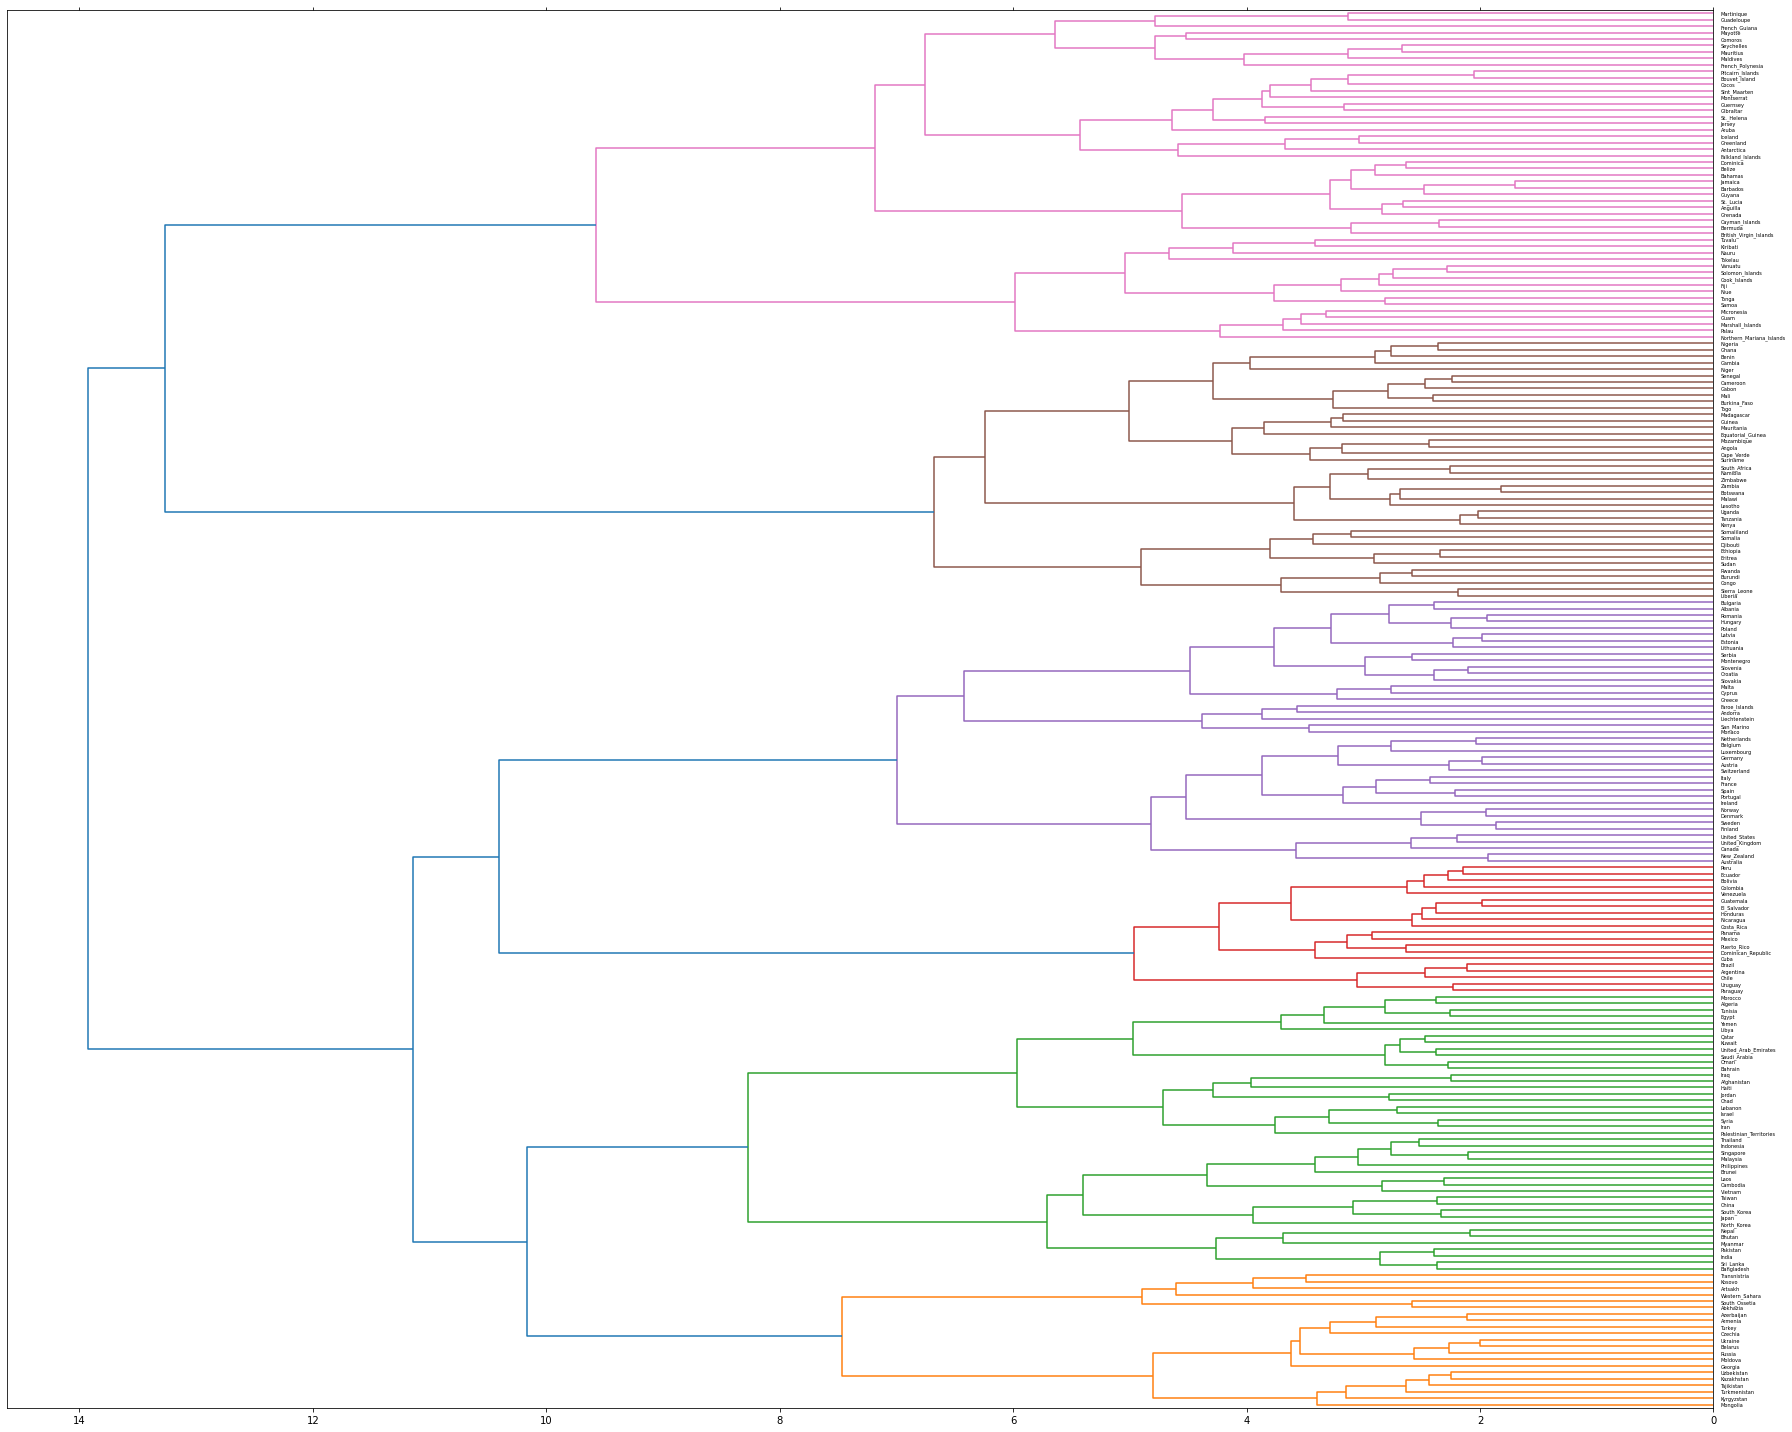

In [7]:
# 68. Ward’s method clustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
with open('list-of-countries.txt') as f:
    countries = [line.strip().replace(" ", "_") for line in f]
countries_vec = []
countries_new = []
for country in countries:
    if country in model:
        countries_vec.append(model[country])
        countries_new.append(country)
Z = linkage(countries_vec, 'ward')
fig, ax = plt.subplots(figsize=(25, 20)) # set size
dendrogram(Z, labels=countries_new, orientation='left');
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout() #show plot with tight layout
plt.show() #show plot


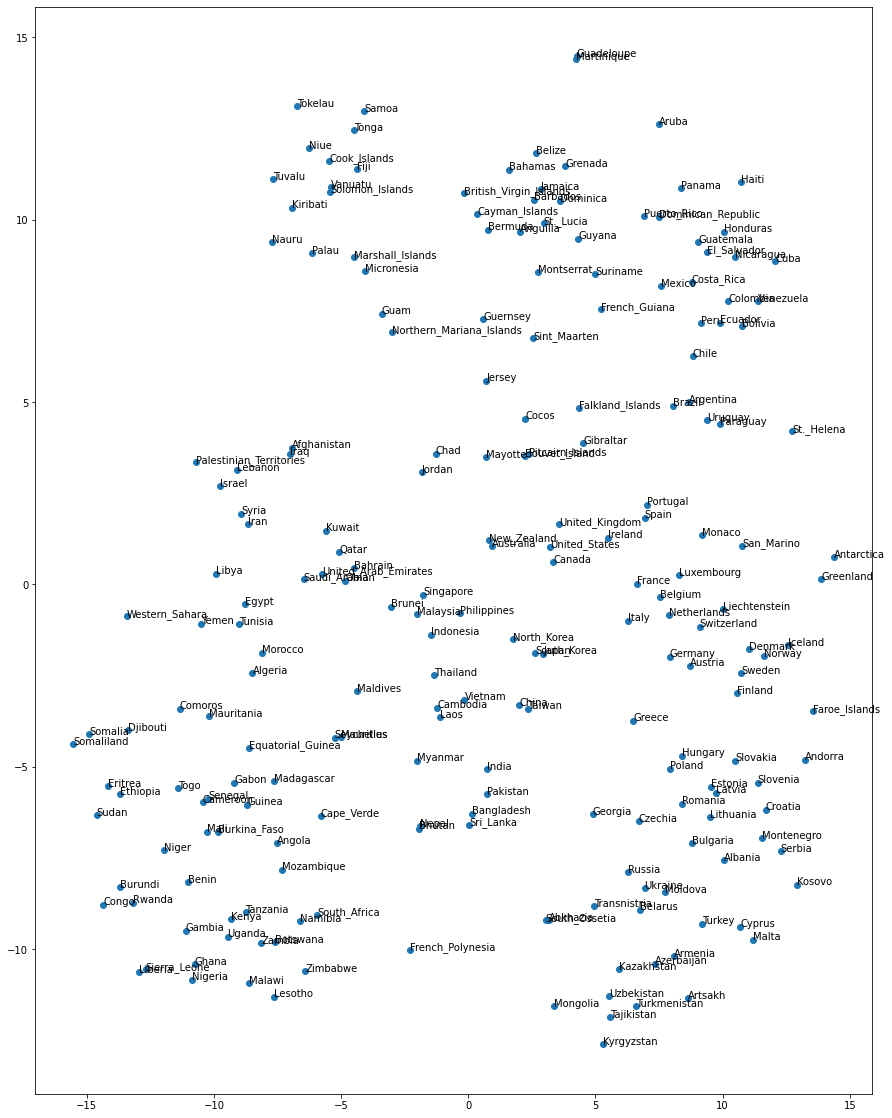

In [8]:
# 69. t-SNE Visualization
import numpy as np
from sklearn.manifold import TSNE
X=np.array(countries_vec)
for i, country in enumerate(countries_new):
    X[i] = model[country]
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax.scatter(X_2d[:,0], X_2d[:,1])
for i, country in enumerate(countries_new):
    ax.annotate(country, (X_2d[i,0], X_2d[i,1]))
plt.show() #show plot